In [ ]:
1. What is Machine Learning and why is it used for?
Machine Learning (ML) is a set of algorithms and statistical models that allow computers to learn patterns from data and make predictions or decisions without explicit programming for the specific task. 
It’s used to automate decision-making, predict outcomes, discover patterns, classify items, detect anomalies, 
and optimize processes in many domains (finance, healthcare, agriculture, recommendation systems, etc.).

2. Define what is a function. Explain why a function is called a basic block of ML.
A function is a mapping f:X→Y that takes input(s)𝑥 from domain 𝑋 and produces output 𝑦 in codomain Y.
In ML, the model is essentially a function y = f(x;θ) parameterized by θ.
Learning is the process of finding θ so that the function maps inputs to correct outputs. Because ML models are (learned) functions that map
features to predictions, the concept of a function is the fundamental building block.
    

3. Explain in your own words what is supervised, unsupervised, and semi-supervised ML.
Supervised learning: Training data includes inputs and corresponding labels (targets). The model learns to predict labels from inputs. Example: classification and regression.
Unsupervised learning: Training data has only inputs (no labels). The model finds structure in the data (clusters, low-dimensional embeddings). Example: clustering, PCA.
Semi-supervised learning: Uses a small amount of labeled data plus a larger amount of unlabeled data. Combines supervised and unsupervised techniques to improve learning when labels are expensive.

4. What is feature scaling? Why is it important?
Feature scaling transforms numeric features to a common scale (e.g., standardization to mean 0 and std 1, or normalization to [0,1]). 
It’s important because many ML algorithms (gradient-based optimization, distance-based models like KNN, linear models with regularization) behave better and converge faster when features are on similar scales.

5. Explain what Normalization and Standardization are. Tabulate differences and use cases.
Normalization (Min–Max): scales features to a fixed range [0,1] or [-1,1] using x′= x-xmin/ xmax-xmin.
Use when you want bounded features (e.g., image pixel intensities, neural nets sometimes).
Standardization (Z-score): transforms features to zero mean and unit variance:
x = x−μ/σ. Use widely for many models (linear regression, logistic regression, SVM) and when outliers are less extreme.

6. Define what is Linear Regression. Why is Linear Regression important?
Linear regression models the relationship between a target y and input features x1, ... xp by a linear function:
y≈β0 + y≈β0 + ...+βpxp. It’s important because it’s interpretable, fast to train, often a good baseline, and the foundation for many more advanced models.

7. What is goal of the best fit line?
The goal is to find model parameters (coefficients) that minimize the chosen loss (commonly Mean Squared Error — MSE) between predicted values and actual target values. 
That yields the “best fit” line which best explains the relationship in the training data.

8. Explain the metric used to determine the effectiveness of Linear Regression model.
  Common metrics:
> MSE (Mean Squared Error): 1/n ∑(yi-y^i)2. lower is better.
> RMSE (Root MSE): MSE (same units as target).
> R2 (Coefficient of Determination): proportion of variance explained by the model:
R2 = 1 - SSres/SStot. R² close to 1 means the model explains most variance.

9. practical question


In [5]:
# EDA - EXPLORE DATA
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


,S. No.,Percentage in Grade 10,Salary
count,50.00000,50.000000,50.000000
mean,25.50000,63.922400,258192.000000
std,14.57738,9.859937,76715.790993
min,1.00000,37.330000,120000.000000
25%,13.25000,57.685000,204500.000000
50%,25.50000,64.700000,250000.000000
75%,37.75000,70.000000,300000.000000
max,50.00000,83.000000,450000.000000


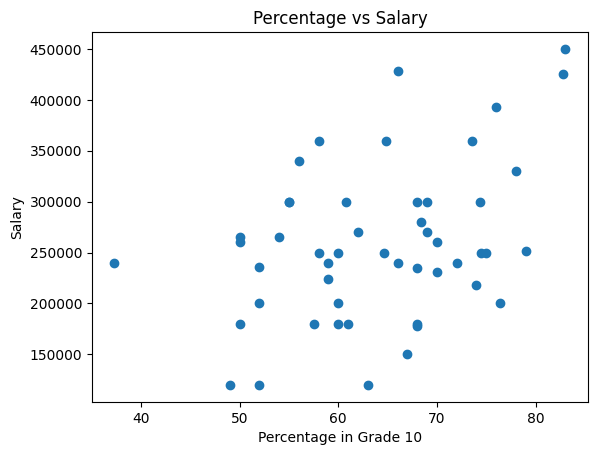

                          S. No.  Percentage in Grade 10    Salary
S. No.                  1.000000               -0.036681  0.018311
Percentage in Grade 10 -0.036681                1.000000  0.395367
Salary                  0.018311                0.395367  1.000000


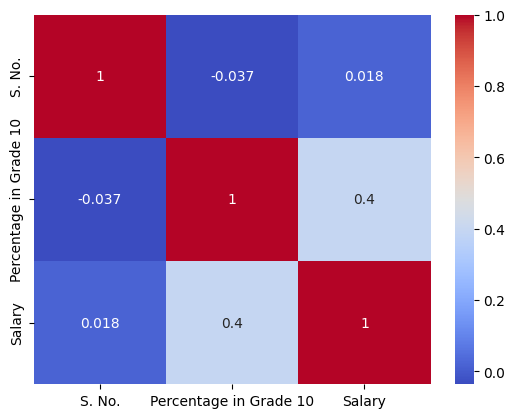

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot to visualize relationship
plt.scatter(df["Percentage in Grade 10"], df["Salary"])
plt.xlabel("Percentage in Grade 10")
plt.ylabel("Salary")
plt.title("Percentage vs Salary")
plt.show()

# Correlation
print(df.corr())
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [9]:
#train-test Split
from sklearn.model_selection import train_test_split

X = df[["Percentage in Grade 10"]]
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 37
Test size: 13


In [10]:
# build linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])


Intercept: 111495.94820378898
Slope: 2256.928405331487


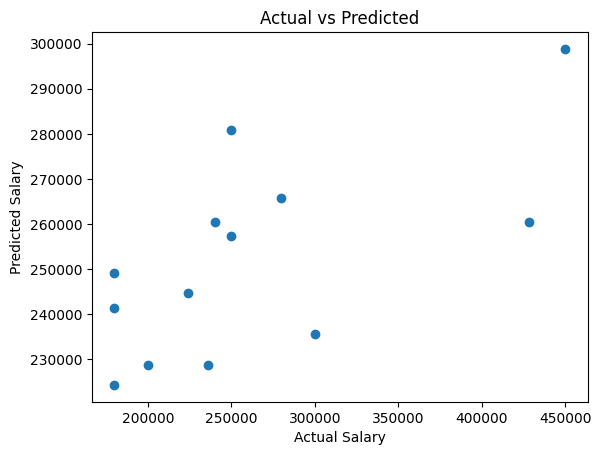

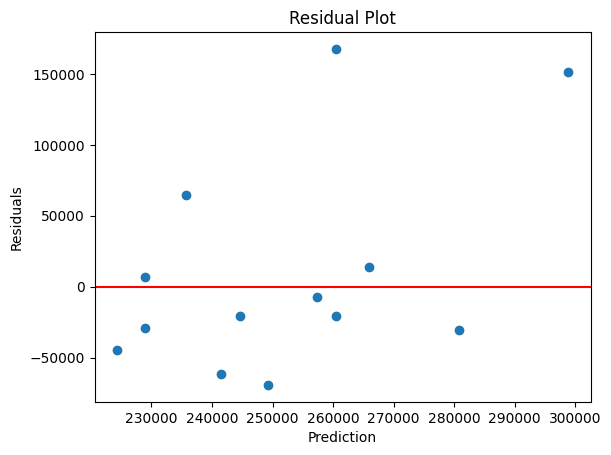

In [11]:
# model diagnostics prediction
y_pred = model.predict(X_test)

# Plot Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [12]:
#validate model performance metrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)


MSE: 5271197220.58912
RMSE: 72603.01109863915
MAE: 52873.599509274114
R² Score: 0.25166803569185325
